# This is my first chapter

In the following part we will import some libraries

In [5]:
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
a = 1

In [8]:
a * 3

3

In [9]:
b = [1,2,3]

In [10]:
b

[1, 2, 3]

In [11]:
b[0]

1

In [12]:
b[1:3]

[2, 3]

In [13]:
c = np.array([1,2,3,4])

In [14]:
c

array([1, 2, 3, 4])

In [15]:
c.mean()

2.5

In [16]:
c.std()

1.1180339887498949

In [17]:
%%timeit
c.mean()

The slowest run took 11.05 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.62 µs per loop


In [18]:
%%timeit
np.mean(b)

The slowest run took 7.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.95 µs per loop


In [19]:
c.dot(c.T)

30

In [20]:
for element in b:
    print element

1
2
3


# Numpy and randomness

In [21]:
x = np.random.randn(100, 100)

In [22]:
x[0, :]
x[:, 0]

array([ 0.15181235,  1.56537542,  0.76554143, -0.99236676,  0.11384435,
        2.20392951, -0.14578916, -0.83263238,  1.0112029 ,  3.26664273,
        0.73571884, -0.11709556, -1.09345816,  1.02229518,  0.76638288,
        0.33337439,  0.24238008, -0.59349283, -0.33470193, -0.44988638,
        0.93883875,  1.82495753,  0.60299325,  0.24055555,  0.62081039,
       -0.13660915,  0.11286524, -0.56699106,  0.15245902,  0.29093224,
       -0.88033754,  1.44277912,  1.47688195,  0.47890756, -0.01931707,
        2.97044933,  1.0532836 , -0.77462023, -0.39464774,  0.49803298,
        0.92414408, -0.22378583,  0.13575134, -1.10860327,  0.12128876,
       -0.17287467, -0.62850676, -0.57678913,  0.73417893, -0.01864171,
        1.23514461, -0.26970654, -0.26733615,  1.51768912,  0.75292958,
        0.3764088 ,  0.23119776,  0.98713707,  1.7295867 , -1.19402619,
       -0.16485331,  0.80938879,  0.20773202, -0.73072658,  0.44588527,
       -0.83540529,  0.46752232, -1.45913689, -0.55529198,  1.42

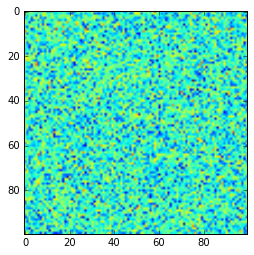

In [23]:
plt.imshow(x)

In [24]:
t = np.linspace(0, 1, 11)

In [25]:
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [27]:
import seaborn as sns
sns.set_style('white')

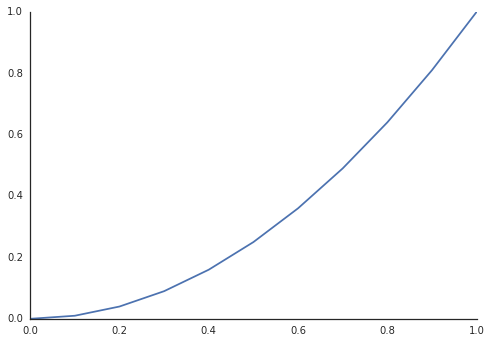

In [29]:
plt.plot(t, t**2)

sns.despine()

# Logistic function

We want to implement the following function:

$\frac{1}{1 + e^{-k ( x - x_0)}}$

In [30]:
def logistic(x, x0=0, k=1):
    return 1 / (1 + np.exp(-k * (x - x0)))

In [37]:
logistic(np.array([0, 5]))

array([ 0.5       ,  0.99330715])

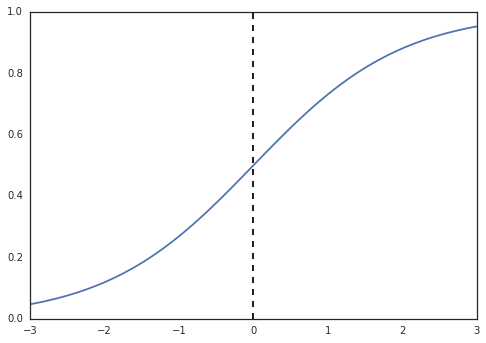

In [40]:
t = np.linspace(-3, 3, 100)

plt.plot(t, logistic(t))

plt.axvline(0, c='k', ls='--')

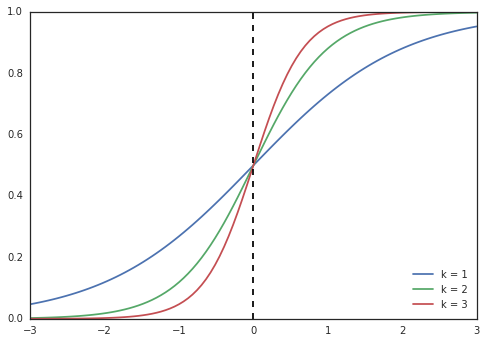

In [44]:
for k in [1,2,3]:
    plt.plot(t, logistic(t, k=k), label='k = %s' % k)

plt.axvline(0, c='k', ls='--')

plt.legend(loc='lower right')

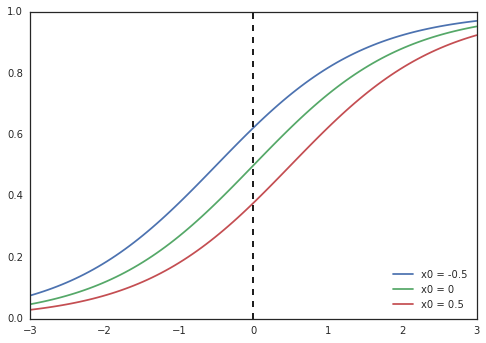

In [45]:
for x0 in [-.5, 0, .5]:
    plt.plot(t, logistic(t, x0=x0), label='x0 = %s' % x0)

plt.axvline(0, c='k', ls='--')

plt.legend(loc='lower right')

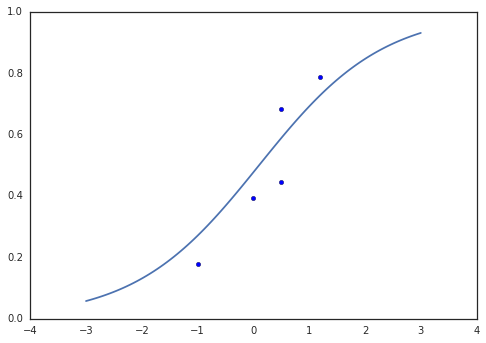

In [54]:
x= np.array([-1, .5, 0, .5, 1.2])

samples = logistic(x, x0=x0, k=k) + np.random.randn(len(x)) * .1

plt.scatter(x, samples)

plt.plot(t, logistic(t, x0=x0, k=k))

In [55]:
pars = (0, 1)

In [57]:
a, b = pars

In [59]:
b

1

In [60]:
def logistic_cost(pars, x, y):
    
    x0, k = pars
    
    predictions = logistic(x, x0, k)
    
    residuals = y - predictions
    
    return np.sum(residuals ** 2)

In [71]:
import scipy as sp

In [76]:
x0 = .1

k = .9

samples = logistic(x, x0=x0, k=k) + np.random.randn(len(x)) * .001



In [79]:
sp.optimize.fmin(logistic_cost, [0, 1], (x, samples))

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 51
         Function evaluations: 99


array([ 0.10060233,  0.90691669])

# behavioral data analysis

In [80]:
import pandas

In [81]:
df = pandas.read_csv('/data/tdcs_data.csv')

In [83]:
df.describe()

,RT,accuracy,angle,block,coherence,left_right,subj_idx,trial_NR
count,52200.000000,52200.000000,52200.0,52200.000000,52200.000000,52200.000000,52200.000000,52200.000000
mean,573.639885,0.729732,180.0,1.505747,0.217459,1.500000,8.655172,300.500000
std,225.551916,0.444103,0.0,0.499972,0.088321,0.500005,4.517767,173.206499
min,0.000000,0.000000,180.0,1.000000,0.065300,1.000000,1.000000,1.000000
25%,426.000000,0.000000,180.0,1.000000,0.155800,1.000000,5.000000,150.750000
50%,519.000000,1.000000,180.0,2.000000,0.206000,1.500000,9.000000,300.500000
75%,667.000000,1.000000,180.0,2.000000,0.276400,2.000000,13.000000,450.250000
max,2013.000000,1.000000,180.0,2.000000,0.417100,2.000000,17.000000,600.000000


In [89]:
spd = df.ix[(df.dataset == 'berkeley') & (df.subj_idx == 2) & (df.acc_spd == 'spd')]
acc = df.ix[(df.dataset == 'berkeley') & (df.subj_idx == 2) & (df.acc_spd == 'acc')]

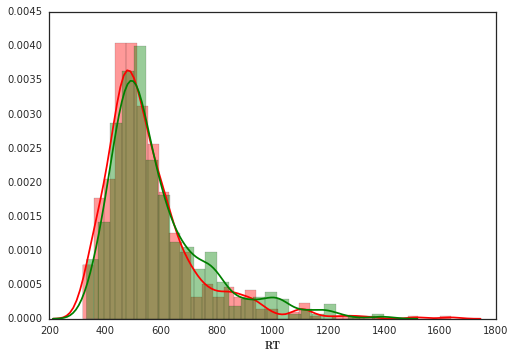

In [94]:
sns.distplot(spd.RT, color='r')
sns.distplot(acc.RT, color='g')

# Split-apply-combine

In [96]:
df.groupby(['dataset', 'acc_spd', 'tdcs']).mean()

RT  accuracy  angle     block  coherence  \
dataset   acc_spd tdcs                                                       
amsterdam acc     anodal  646.143488  0.758057  180.0  1.467770   0.247924   
                  sham    634.631287  0.758697  180.0  1.536007   0.246180   
          spd     anodal  526.435570  0.701342  180.0  1.465548   0.247205   
                  sham    517.584132  0.710943  180.0  1.530644   0.248962   
berkeley  acc     anodal  602.479867  0.752836  180.0  1.529477   0.203150   
                  sham    643.458872  0.787405  180.0  1.506468   0.186086   
          spd     anodal  476.818424  0.706548  180.0  1.537181   0.199521   
                  sham    488.880084  0.720660  180.0  1.493842   0.185765   
leiden    acc     anodal  681.479390  0.752204  180.0  1.424351   0.210309   
                  sham    675.736880  0.767989  180.0  1.569223   0.209011   
          spd     anodal  505.936950  0.665477  180.0  1.432786   0.208906   
                  sham    489.149678  0.674863  180.0  1.573645   0.210207   

                          left_right  subj_idx    trial_NR  
dataset   acc_spd tdcs                                      
amsterdam acc     anodal    1.498234  9.525828  301.764459  
                  sham      1.502548  9.491912  300.914691  
          spd     anodal    1.501790  9.540940  299.218568  
                  sham      1.497437  9.574994  300.082906  
berkeley  acc     anodal    1.501224  7.985539  302.609566  
                  sham      1.504515  8.498413  303.733952  
          spd     anodal    1.498779  8.014428  298.395117  
                  sham      1.495701  8.501511  297.420869  
leiden    acc     anodal    1.506076  8.132714  302.817965  
                  sham      1.504631  8.136547  303.227499  
          spd     anodal    1.493933  8.152986  298.185344  
                  sham      1.495345  8.149200  297.758176

In [97]:
df.groupby(['dataset', 'acc_spd', 'tdcs']).agg([np.mean, np.std])

RT              accuracy           angle  \
                                mean         std      mean       std  mean   
dataset   acc_spd tdcs                                                       
amsterdam acc     anodal  646.143488  232.785711  0.758057  0.428307   180   
                  sham    634.631287  236.403406  0.758697  0.427921   180   
          spd     anodal  526.435570  178.834476  0.701342  0.457721   180   
                  sham    517.584132  173.580432  0.710943  0.453375   180   
berkeley  acc     anodal  602.479867  228.131696  0.752836  0.431411   180   
                  sham    643.458872  246.001096  0.787405  0.409193   180   
          spd     anodal  476.818424  166.685090  0.706548  0.455394   180   
                  sham    488.880084  150.077708  0.720660  0.448727   180   
leiden    acc     anodal  681.479390  268.508377  0.752204  0.431784   180   
                  sham    675.736880  281.216888  0.767989  0.422166   180   
          spd     anodal  505.936950  172.019653  0.665477  0.471880   180   
                  sham    489.149678  164.188326  0.674863  0.468482   180   

                                  block           coherence            \
                          std      mean       std      mean       std   
dataset   acc_spd tdcs                                                  
amsterdam acc     anodal  0.0  1.467770  0.499015  0.247924  0.090112   
                  sham    0.0  1.536007  0.498757  0.246180  0.089581   
          spd     anodal  0.0  1.465548  0.498867  0.247205  0.090580   
                  sham    0.0  1.530644  0.499116  0.248962  0.091087   
berkeley  acc     anodal  0.0  1.529477  0.499186  0.203150  0.091446   
                  sham    0.0  1.506468  0.500019  0.186086  0.073996   
          spd     anodal  0.0  1.537181  0.498671  0.199521  0.091866   
                  sham    0.0  1.493842  0.500020  0.185765  0.073538   
leiden    acc     anodal  0.0  1.424351  0.494303  0.210309  0.081750   
                  sham    0.0  1.569223  0.495244  0.209011  0.081050   
          spd     anodal  0.0  1.432786  0.495521  0.208906  0.080782   
                  sham    0.0  1.573645  0.494606  0.210207  0.081487   

                         left_right            subj_idx              trial_NR  \
                               mean       std      mean       std        mean   
dataset   acc_spd tdcs                                                          
amsterdam acc     anodal   1.498234  0.500052  9.525828  4.776143  301.764459   
                  sham     1.502548  0.500049  9.491912  4.783059  300.914691   
          spd     anodal   1.501790  0.500053  9.540940  4.742792  299.218568   
                  sham     1.497437  0.500049  9.574994  4.735550  300.082906   
berkeley  acc     anodal   1.501224  0.500054  7.985539  4.362727  302.609566   
                  sham     1.504515  0.500041  8.498413  4.029804  303.733952   
          spd     anodal   1.498779  0.500054  8.014428  4.278858  298.395117   
                  sham     1.495701  0.500040  8.501511  4.033326  297.420869   
leiden    acc     anodal   1.506076  0.500023  8.132714  4.415100  302.817965   
                  sham     1.504631  0.500038  8.136547  4.442199  303.227499   
          spd     anodal   1.493933  0.500023  8.152986  4.461337  298.185344   
                  sham     1.495345  0.500038  8.149200  4.434382  297.758176   

                                      
                                 std  
dataset   acc_spd tdcs                
amsterdam acc     anodal  173.851679  
                  sham    171.686755  
          spd     anodal  172.576290  
                  sham    174.755698  
berkeley  acc     anodal  172.865286  
                  sham    172.974499  
          spd     anodal  173.555795  
                  sham    173.408020  
leiden    acc     anodal  171.920810  
                  sham    172.716041  
          spd     anodal  174.487791  
     

In [100]:
for g, d in df.groupby('dataset'):
    print g, d.shape

amsterdam (18000, 12)
berkeley (17400, 12)
leiden (16800, 12)


In [102]:
df.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR
0,467,spd,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,1
1,427,acc,1,180,2,0.4171,berkeley,S1.2,2,1,anodal,2
2,440,acc,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,3
3,454,acc,1,180,2,0.4171,berkeley,S1.2,2,1,anodal,4
4,400,acc,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,5


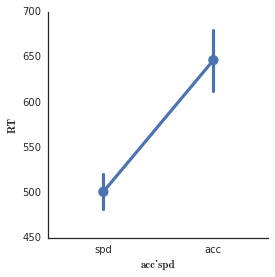

In [103]:
sns.factorplot('acc_spd', 'RT', data=df, units='subj_idx')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=9.35. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


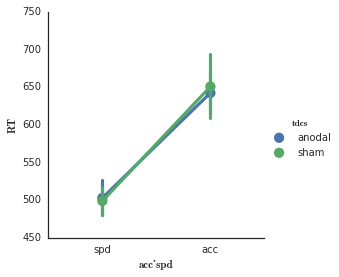

In [104]:
sns.factorplot('acc_spd', 'RT', 'tdcs', data=df, units='subj_idx')

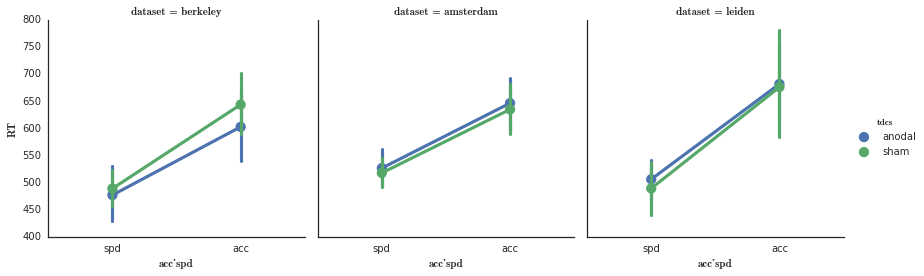

In [105]:
sns.factorplot('acc_spd', 'RT', 'tdcs', data=df, units='subj_idx', col='dataset')

In [106]:
%load_ext rpy2.ipython

In [109]:
%%R -i df -o a

print(head(df))

a = 3

   RT acc_spd accuracy angle block coherence  dataset   id left_right subj_idx
0 467     spd        1   180     2    0.4171 berkeley S1.2          1        1
1 427     acc        1   180     2    0.4171 berkeley S1.2          2        1
2 440     acc        1   180     2    0.4171 berkeley S1.2          1        1
3 454     acc        1   180     2    0.4171 berkeley S1.2          2        1
4 400     acc        1   180     2    0.4171 berkeley S1.2          1        1
5 414     acc        1   180     2    0.4171 berkeley S1.2          2        1
    tdcs trial_NR
0 anodal        1
1 anodal        2
2 anodal        3
3 anodal        4
4 anodal        5
5 anodal        6


In [113]:
df_subj = df.groupby(['subj_idx', 'tdcs', 'acc_spd', 'dataset'], as_index=False).mean()

In [118]:
%%R -i df_subj

library(BayesFactor)



bf = anovaBF(RT ~ acc_spd*tdcs, data=df_subj, whichRandom=c('subj_idx', 'dataset'), whichModels='top')

print(bf)

  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from tdcs + acc_spd + tdcs:acc_spd , BF is...
[1] Omit acc_spd:tdcs : 4.328795     ±2.88%
[2] Omit acc_spd      : 1.080618e-13 ±5.47%
[3] Omit tdcs         : 6.464938     ±2.59%

Against denominator:
  RT ~ tdcs + acc_spd + tdcs:acc_spd 
---
Bayes factor type: BFlinearModel, JZS



In [120]:
for g, d in df.groupby('dataset'):
    %R -i d
    %R print(head(d))

       RT acc_spd accuracy angle block coherence   dataset    id left_right
17400  83     spd        1   180     1    0.4171 amsterdam A10.1          2
17401 651     acc        1   180     1    0.4171 amsterdam A10.1          2
17402 601     acc        0   180     1    0.4171 amsterdam A10.1          1
17403 484     acc        1   180     1    0.4171 amsterdam A10.1          1
17404 567     acc        0   180     1    0.4171 amsterdam A10.1          2
17405 451     acc        0   180     1    0.4171 amsterdam A10.1          1
      subj_idx   tdcs trial_NR
17400       10 anodal        1
17401       10 anodal        2
17402       10 anodal        3
17403       10 anodal        4
17404       10 anodal        5
17405       10 anodal        6


   RT acc_spd accuracy angle block coherence  dataset   id left_right subj_idx
0 467     spd        1   180     2    0.4171 berkeley S1.2          1        1
1 427     acc        1   180     2    0.4171 berkeley S1.2          2        1
2 440     acc        1   180     2    0.4171 berkeley S1.2          1        1
3 454     acc        1   180     2    0.4171 berkeley S1.2          2        1
4 400     acc        1   180     2    0.4171 berkeley S1.2          1        1
5 414     acc        1   180     2    0.4171 berkeley S1.2          2        1
    tdcs trial_NR
0 anodal        1
1 anodal        2
2 anodal        3
3 anodal        4
4 anodal        5
5 anodal        6


        RT acc_spd accuracy angle block coherence dataset   id left_right
35400    0     acc        0   180     1    0.2864  leiden L1.1          1
35401 1271     acc        1   180     1    0.2864  leiden L1.1          2
35402 1337     acc        1   180     1    0.2864  leiden L1.1          1
35403  568     spd        1   180     1    0.2864  leiden L1.1          2
35404  535     spd        1   180     1    0.2864  leiden L1.1          2
35405  401     spd        1   180     1    0.2864  leiden L1.1          1
      subj_idx   tdcs trial_NR
35400        1 anodal        1
35401        1 anodal        2
35402        1 anodal        3
35403        1 anodal        4
35404        1 anodal        5
35405        1 anodal        6
